# Abstract
### What is the purpose of this notebook?
In this python notebook, a dataset of 10,100 used vehicle listings will be explored.<br>
The intent of this exploration is to attempt to determine:
* The types of variables present
* The level of significance of these variables
* Any trends that may appear

This is by no means an all en-compassing or elaborate construct of data, or meaningful<br>
contribution to the field of automovtive academia. The proccesses that follow are meant<br>
to showcase various uses of statistical analysis, the contemplative thought processes<br>
and decision making steps that are required to explore such data.<br>
Several issues exist in the broader scope of this data analysis:<br>
1. There is a naturally existing bias in listing prices as compared to final sale price
 - List prices tend to be higher than final sale price
2. Many variables known to affect list price are not accounted for!
 - Things such as engine displacement, luxury add-ons, etc..

Therefore, it is imperative to relay the fact that the scope of this analysis<br>
is limited by the aforementioned constraints. Any conclusions that are drawn <br>
lie squarely in the realm in which they are discovered, and reveal no connection<br>
to any previously un-related topics or concepts.

# Methodology
### How will this be done?
1. Read in and clean the data
2. Isolate and identify the variables
3. Determine baselines on numerical data
4. Determine mean trends / categorical similarities
5. Look for outliers and other sources of confounding
6. Analyze for statistical significance
9. Identify any possible regressions
10. Graph and discuss findings

In [2]:
# Import nesessary libraries
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

## Read in and clean the Data

In [3]:
df= pd.read_csv('cars.data')
df.head()

,year,maker,model,color,trans,drivet,mileage,price,body_code
0,2015,Honda,Accord Sport,Gray,CVT,FWD,51323,15900,20211
1,2013,Mercedes-Benz,C250 Sport,White,Automatic,RWD,31338,14974,20211
2,2015,Honda,Accord Sport,Black,CVT,FWD,64477,14985,20211
3,2018,Toyota,Corolla LE,Other,CVT,FWD,30545,15985,20211
4,2014,Toyota,Camry LE,Gray,Automatic,FWD,47188,12981,20211


In [4]:
df.describe()

,year,mileage,price,body_code
count,10100.000000,10100.000000,10100.000000,10100.00000
mean,2015.900990,40612.086040,25614.027624,20213.88099
std,2.654009,29616.792703,11733.382599,3.03250
min,1960.000000,8.000000,2498.000000,20210.00000
25%,2015.000000,22156.250000,17322.500000,20211.00000
50%,2016.000000,34042.000000,23530.000000,20211.00000
75%,2017.000000,49454.000000,31400.000000,20217.00000
max,2020.000000,506274.000000,169991.000000,20217.00000


In [5]:
df[['maker', 'model','color','trans','drivet']].describe()

,maker,model,color,trans,drivet
count,10100,10099,10100,10100,10100
unique,42,1707,14,5,6
top,Toyota,Camry SE,White,Automatic,FWD
freq,931,118,2369,8134,4125


In [6]:
df.isnull().sum()

year         0
maker        0
model        1
color        0
trans        0
drivet       0
mileage      0
price        0
body_code    0
dtype: int64

## Isolate and determine the variables and their types

In [7]:
df.dtypes

year          int64
maker        object
model        object
color        object
trans        object
drivet       object
mileage       int64
price         int64
body_code     int64
dtype: object

1. Categorical (Discrete)
    * year
    * maker
    * color
    * trans
    * drivet
    * body_code
2. Continuous
    * model
    * mileage
    * price (class)

## Determine baselines in numeric data

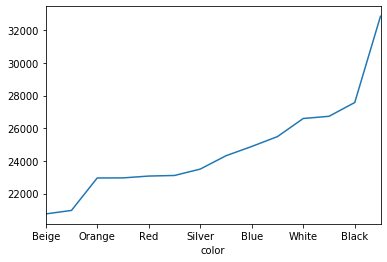

In [8]:
# Quick note about proper graphing!!
# Notice how this graph showing the mean prices (sorted) of different car colors:
# It appears to have a sharp upward trend, falsely indicating a major uptick.
fig= plt.figure()
ax= df.groupby('color')['price'].mean().sort_values().plot()

(0, 13)

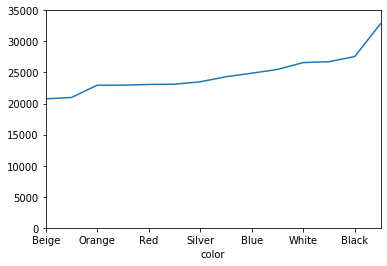

In [9]:
# If the y axis is fixed to show a more wide range of prices (from 0 to 35k)
# That trend disappears.
fig= plt.figure()
ax= df.groupby('color')['price'].mean().sort_values().plot()
ax.set_ylim(0, 35000)
ax.set_xlim(0, 13)

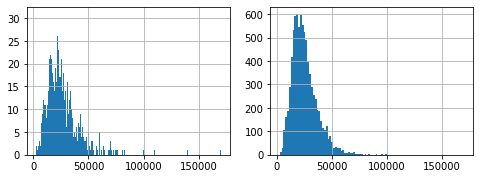

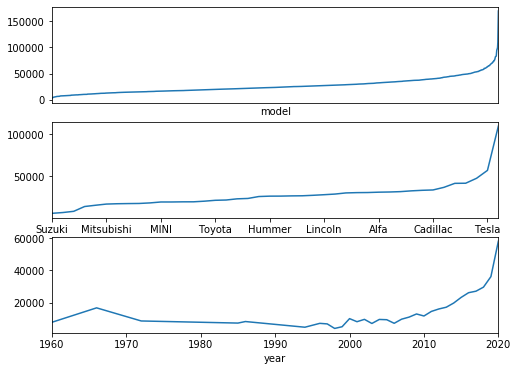

In [10]:
fig= plt.figure(figsize=(8,6))
ax= fig.add_subplot(221)
ax= df.groupby('model')['price'].mean().hist(bins=500)
ax2= fig.add_subplot(222)
ax2= df.groupby('mileage')['price'].mean().hist(bins=100)


fig2= plt.figure(figsize=(8,6))
ax5= fig2.add_subplot(311)
ax5= df.groupby('model')['price'].mean().sort_values().plot()
ax5.set_xticks([])
ax7= fig2.add_subplot(312)
ax7= df.groupby('maker')['price'].mean().sort_values().plot()
ax8= fig2.add_subplot(313)
ax8= df.groupby('year')['price'].mean().plot()

In [11]:
# Remove major outliers in this data.
df2 = df[df['price']<100000]
df3 = df2[df2['year']> 1989]

<Figure size 432x288 with 0 Axes>

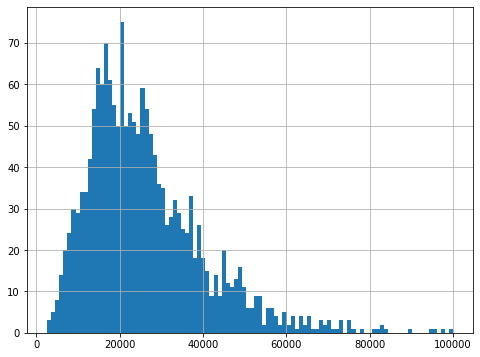

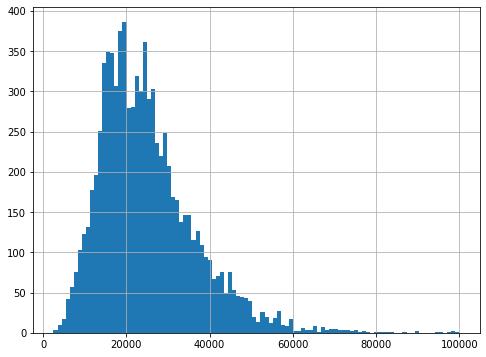

In [12]:
fig= plt.figure()
plt.subplots(figsize=(8,6))
df3.groupby('model')['price'].mean().hist(bins=100)
plt.subplots(figsize=(8,6))
df3.groupby('mileage')['price'].mean().hist(bins=100)

([], <a list of 0 Text xticklabel objects>)

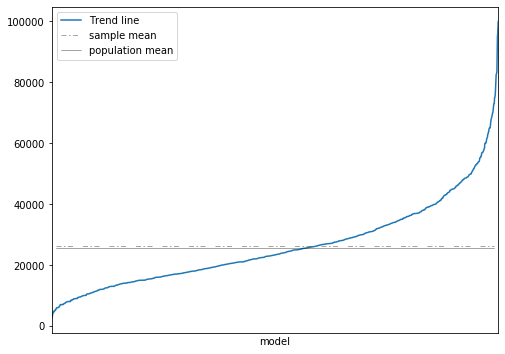

In [13]:


plt.subplots(figsize=(8,6))
df3.groupby('model')['price'].mean().sort_values().plot(label='Trend line')
plt.axhline(df3.groupby('model').mean()['price'].mean(), 0.01, 0.99, color='black', dashes=(10,5,3,5,10,20), alpha=.7,
           linewidth=.5, label='sample mean')
plt.axhline(df3.price.mean(), 0.01, 0.99, color='black', alpha=.7, linewidth=.5, label='population mean')
plt.legend(loc='upper left')
plt.xticks([])

## Get some basic statistical analysis on this data

In [14]:
def statsGet(self, sample=True, confidence=0.95, get='none', h0='none'):
    '''This section of the function will place the passed data into a numpy array with the variable name data.
    Secondly defines N, mean, and variance.'''
    data= np.array(self)
    N= len(data)
    mean= sum(data)/N
    
    '''Define the function for finding variance'''
    def variance(data, sample=True):
        if sample!= True:
            diff= [x- mean for x in data]
            vari 
        else:
            diff= [x- mean for x in data]
            variance= sum([i**2 for i in diff])/(N-1)
            return variance
    
    '''Define the function for finding the sample deviation'''
    def deviation(data, sample=True):
        if sample!= True:
            return variance(data, sample=False)**.5
        else:
            return variance(data)**.5
    
    '''Define the function for finding the standard error'''
    def stderr(data, sample=True):
        if sample!= True:
            return deviation(data, sample=False)/(N**.5)
        else:
            return deviation(data)/((N-1)**.5)
        
    '''Define Interval'''
    def interval(data, sample=True):
        if sample!= True:
            return stderr(data, sample=False)* sps.t.ppf((1 + confidence) / 2, N)
        else:
            return stderr(data)* sps.t.ppf((1 + confidence) / 2, N - 1)
        
    def format2(value):
        return '{:.2f}'.format(value)
    
    if sample!= True:
        
        '''Values for statistical analysis for population data.'''
        if get == 'none':
            raise ValueError('No analysis requested')
        if get == 'ci':
            return [mean-interval(data, sample=False), mean+interval(data, sample=False)]
        if get == 'ttest':
            if h0 == 'none':
                raise ValueError('Null Hypothesis not indicated.')
            else:
                return sps.ttest_1samp(data, h0, nan_policy='omit')
        if get == 'dev':
            return deviation(data, sample=False)
        
        '''Values for statistical analysis for sample data.'''
    else:
        if get == 'stderr':
            return stderr(data)
        if get == 'none':
            raise ValueError('No analysis requested')
        if get == 'ci':
            return [mean-interval(data), mean+interval(data)]
        if get == 'ttest':
            if h0 == 'none':
                raise ValueError('Null Hypothesis not indicated.')
            else:
                return sps.ttest_1samp(data, h0, nan_policy='omit')
        if get == 'dev':
            return deviation(data)

In [15]:
# Look at the covariance matrix
df3.cov()

,year,mileage,price,body_code
year,6.116462,-5.213198e+04,1.223423e+04,0.591205
mileage,-52131.976949,8.710115e+08,-1.545783e+08,-467.238194
price,12234.230585,-1.545783e+08,1.335853e+08,9866.149128
body_code,0.591205,-4.672382e+02,9.866149e+03,9.194609


In [16]:
# Check regressional strength
df3.corr()

,year,mileage,price,body_code
year,1.000000,-0.714237,0.428003,0.078835
mileage,-0.714237,1.000000,-0.453166,-0.005221
price,0.428003,-0.453166,1.000000,0.281515
body_code,0.078835,-0.005221,0.281515,1.000000


In [17]:
compare= 'price'

# Dictionary to hold results
sig= []
nsig= []
pdict= {}
# t-test to check for statistic significance against population mean
for x in df3:
    if x in compare:
        pass
    else:
        mean1= df3.groupby(str(x))[compare].mean()
        mean2= df3[compare].mean()
        if statsGet(mean1, get='ttest', h0= mean2)[1] <0.05:
            sig.append(x)
        else:
            nsig.append(x)
        # Calculate percent variance contribution
        total_mean= df3.groupby(str(x)).mean()[compare].mean()
        dom= (mean1 - total_mean)
        variance= sum([v**2 for v in dom]) / (len(mean1)-1)
        per_var= (((variance**.5)*100)/total_mean)
        pdict[x]= per_var

# New dict to store percent variance as total of all variables (out of 100%)
p2dict= {}
pdictsums= sum([x for y, x in pdict.items()])

for key, value in pdict.items():
    v2 = (value) / pdictsums
    p2dict[key]= v2

# compile final values to plot the graph as a list of tuples
final_values= sorted(p2dict.items(),reverse=True, key= lambda x: x[1])

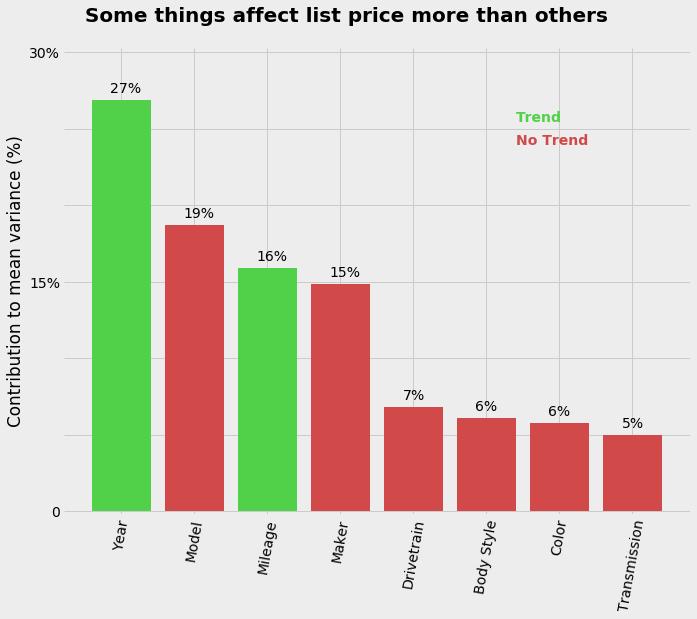

In [268]:
# The first graph will show the spread of variance contribution
# showing how much each variable contributes to price fluctuation
# as compared to the other variables.
# This is by no means an exhuastive list of every variable
# that affects the price of motor vehicles, and this graph
# can be considered only a partial representation of this data.

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8), facecolor='#ededed')
plt.axes(facecolor='#ededed', frameon=False)
plt.text(x= -.5, y= .32, s='Some things affect list price more than others', fontsize=20, fontweight='bold')
for i, k in enumerate(final_values):
    if k[0] in sig:
        plt.bar(k[0], k[1], color='#50d149')
        plt.text(x= (i - .15), y= (k[1] + 0.005), s='{:.0f}%'.format(k[1]*100))
    else:
        plt.bar(k[0], k[1], color='#d14949')
        plt.text(x= (i - .15), y= (k[1] + 0.005), s='{:.0f}%'.format(k[1]*100))
        
plt.grid(True)

plt.text(x= 5.4, y= .255, s='Trend', color='#50d149', fontsize=14, fontweight='bold')
plt.text(x= 5.4, y= .24, s='No Trend', color='#d14949', fontsize=14, fontweight='bold')

plt.yticks([0, .05, .10, .15, .2, .25, .30], labels=['0', '', '', '15%', '', '', '30%'])
plt.ylim(-0.002, 0.303)
plt.ylabel('Contribution to mean variance (%)')
plt.xticks([0,1,2,3,4,5,6,7], labels=['Year', 'Model', 'Mileage', 'Maker', 'Drivetrain',
                                     'Body Style', 'Color', 'Transmission'], rotation=80)
plt.show();

In [176]:
df4= df3[df3['mileage']< 250000]

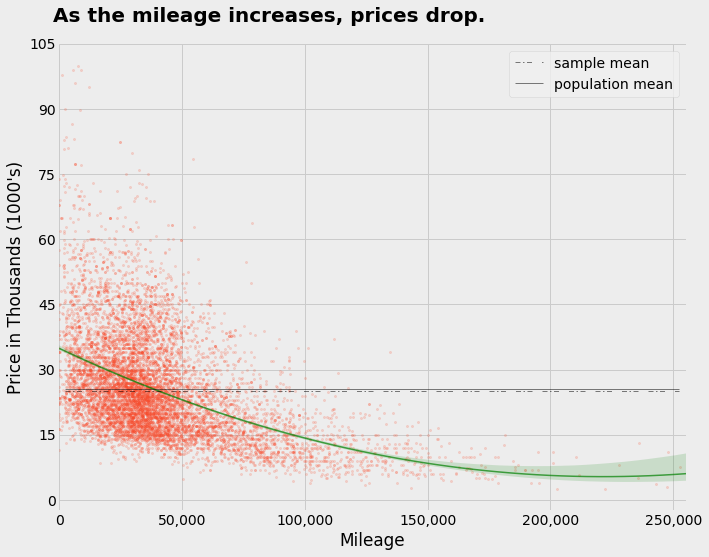

In [330]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,8), facecolor='#ededed')
plt.axes(facecolor='#ededed', frameon=False)

plt.text(x= -2500, y= 110000, s='As the mileage increases, prices drop.', fontsize=20, fontweight='bold')


plt.scatter(df3['mileage'], df3['price'], s=5, marker='o', alpha=0.2, color='C1')
sns.regplot(x='mileage', y='price', data=df3, scatter=False, order=2, truncate=True, line_kws={'linewidth':1.5, 'color':'green', 'alpha':0.7})

plt.axhline(df3.groupby('mileage').mean()['price'].mean(), 0.01, 0.99, color='black', dashes=(10,5,3,5,10,20), alpha=1,
           linewidth=.5, label='sample mean')
plt.axhline(df3.price.mean(), 0.01, 0.99, color='black', alpha=1, linewidth=.5, label='population mean')

plt.legend()

plt.yticks([0, 15000, 30000, 45000, 60000, 75000, 90000, 105000], labels=['0', '15', '30', '45', '60', '75', '90', '105'])
plt.ylabel("Price in Thousands (1000's)")

plt.xlim(0, 255000)
plt.xticks([0, 50000, 100000, 150000, 200000, 250000], labels=['0', '50,000', '100,000', '150,000', '200,000', '250,000'])
plt.xlabel('Mileage')
plt.show();

Text(0.5, 0, 'Year model')

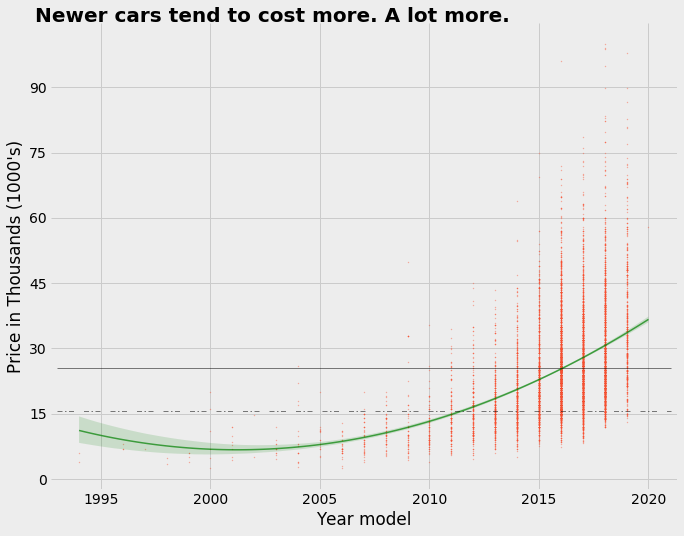

In [331]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8), facecolor='#ededed')
plt.axes(facecolor='#ededed', frameon=False)

plt.text(x=1992, y= 105000, s='Newer cars tend to cost more. A lot more.', fontsize=20, fontweight='bold')
plt.scatter(df3['year'], df3['price'], color='C1', s=1, alpha=.3)
sns.regplot(x= 'year', y= 'price', data= df3, scatter=False, order=2, truncate=True, line_kws={'linewidth':1.5, 'color':'green', 'alpha':0.7})

plt.axhline(df3.groupby('year').mean()['price'].mean(), 0.01, 0.99, color='black', dashes=(10,5,3,5,10,20), alpha=1,
           linewidth=.5, label='sample mean')
plt.axhline(df3.price.mean(), 0.01, 0.99, color='black', alpha=1, linewidth=.5, label='population mean')

plt.yticks([0, 15000, 30000, 45000, 60000, 75000, 90000], labels=['0', '15', '30', '45', '60', '75', '90'])
plt.ylabel("Price in Thousands (1000's)")

plt.xlabel('Year model')

Text(0.5, 0, 'Percent of car models plotted')

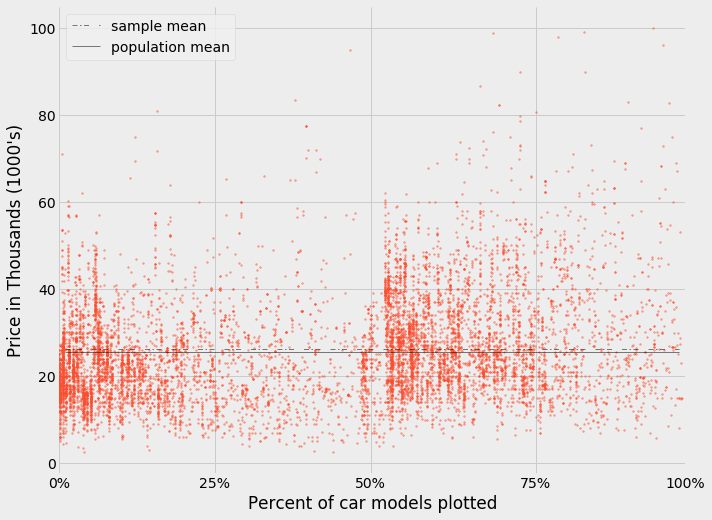

In [335]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8), facecolor='#ededed')
plt.axes(facecolor='#ededed', frameon=False)

plt.scatter(df4['model'], df4['price'], s=3, alpha=.5, color='C1')
#df4.groupby('model')['price'].mean().plot(color='green', alpha=0.3, linewidth=1 )
plt.axhline(df3.groupby('model').mean()['price'].mean(), 0.01, 0.99, color='black', dashes=(10,5,3,5,10,20), alpha=1,
           linewidth=.5, label='sample mean')
plt.axhline(df3.price.mean(), 0.01, 0.99, color='black', alpha=1, linewidth=.5, label='population mean')

plt.legend()

plt.xticks([0, 425, 850, 1300, 1707], labels=['0%', '25%', '50%', '75%', '100%'])
plt.xlim(0, 1708)
plt.yticks([0, 20000, 40000, 60000, 80000, 100000], labels=['0', '20', '40', '60', '80', '100'])
plt.ylabel("Price in Thousands (1000's)")
plt.xlabel('Percent of car models plotted')